In [571]:
import pandas as pd

In [572]:
## query the twitter-archive data
df=pd.read_csv('/Users/balance/Desktop/Twitter_Project/twitter-archive-enhanced.csv')

In [573]:
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [575]:
df.shape

(2356, 17)

In [576]:
## data qulity and tideness issue inspection.

Data Qulity Issue
    
    1.NaN value in some column
    2.some datatype is not collect, need to be convert to correct data type
    3.some rating_denominator column is not equal '10'
    4.some rating_numerator is way more larger than '10'
    5.Missing value in Name columns


Data Tideness Issue
    
    1.date and time mixed in timestamp column
    2.not all name in name column is first letter capitalized.

In [577]:
## find out any duplicate rows.
sum(df.duplicated())

0

In [578]:
## missing value under name. since name is not important index, no action taken
df.name.value_counts().head(20)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
an           7
Buddy        7
Daisy        7
Toby         7
Bailey       7
Rusty        6
Dave         6
Name: name, dtype: int64

In [579]:
# list all names that are NOT capitalized
err_names_mask = df.name.str.contains('^[a-z]', regex = True)
df[err_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [580]:
len(df[err_names_mask])

109


this list contains non-capitalized words from the 'name' column for 109 tweets. none of which are a valid name.

In [581]:
# number of tweets with missing urls
sum(df.expanded_urls.isna())

59

In [582]:
# how many tweets with missing urls are replies or retweets?
sum(df.expanded_urls.isna() & \
    (df.in_reply_to_status_id.notnull() | \
     df.retweeted_status_id.notnull()))

56

In [583]:
# display tweets that are missing urls, and are NOT replies and are NOT retweets
mask = df.expanded_urls.isna() & \
       df.in_reply_to_status_id.isna() & \
       df.retweeted_status_id.isna()
df[mask][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


In [584]:
## make sure python and pd is up to date.

In [585]:
from platform import python_version

print(python_version())

3.7.9


In [586]:
# pd.__version__

In [587]:
# conda update pandas

In [588]:
## visit Twitter Developer Portal, create account

In [589]:
## scrape the tweepy data from twiter API 
### Applied twitter account
## scrape twitter info

## import tweepy
## from tweepy import OAuthHandler
## import json
## from timeit import default_timer as timer

In [590]:
## consumer_key='xxxxxxxxxxxxxxxxxxxxxxx'
## consumer_secret='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

## access_token='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
## access_secret='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'


## auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
## auth.set_access_token(access_token,access_secret)

## api=tweepy.API(auth,wait_on_rate_limit=True)

## tweet_ids=df.tweet_id.values
## len(tweet_ids)

#tweet=api.get_status(666029285002620928,tweet_mode='extended')

#tweet

## tweet_ids = df.tweet_id.values
## len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
## count = 0
## fails_dict = {}
## start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
## with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        # count += 1
        # print(str(count) + ": " + str(tweet_id))
        # try:
            # tweet = api.get_status(tweet_id, tweet_mode='extended')
            # print("Success")
            # json.dump(tweet._json, outfile)
            # outfile.write('\n')
        # except tweepy.TweepError as e:
           # print("Fail")
           # fails_dict[tweet_id] = e
           # pass
## end = timer()
## print(end - start)
## print(fails_dict)


In [591]:
df_clean=df.copy()

In [592]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [593]:
# Seperate time and date into two different columns

In [594]:
df_clean['timestamp_date']=pd.to_datetime(df_clean['timestamp']).dt.date

In [595]:
df_clean['timestamp_time']=pd.to_datetime(df_clean['timestamp']).dt.time

In [596]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,timestamp_date,timestamp_time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56


In [597]:
### Adjusting the denominator,make sure all is '10'
df_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [598]:
 ## make sure all denominator is equal 10

In [599]:
df_clean['rating_denominator_1']=df_clean['rating_denominator']
df_clean.loc[df['rating_denominator'] != '10','rating_denominator_1']=10

In [600]:
df_clean.rating_denominator_1.value_counts()

10    2356
Name: rating_denominator_1, dtype: int64

In [601]:
list(df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'timestamp_date',
 'timestamp_time',
 'rating_denominator_1']

In [602]:
df_image_predictions=pd.read_csv('/Users/balance/Desktop/Twitter_Project/image-predictions.tsv')

In [603]:
df_image_predictions.head(3)

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...


In [604]:
df_image_predictions

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...
...,...
2070,891327558926688256\thttps://pbs.twimg.com/medi...
2071,891689557279858688\thttps://pbs.twimg.com/medi...
2072,891815181378084864\thttps://pbs.twimg.com/medi...
2073,892177421306343426\thttps://pbs.twimg.com/medi...


In [605]:
df_jason_copy=pd.read_json('/Users/balance/Desktop/Twitter_Project/tweet-json copy',lines=True)
df_jason_copy.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [606]:
df_jason_copy.shape

(2354, 31)

In [607]:
df_jason_copy.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [608]:
df_jason_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [609]:
## update datatype

df_jason_copy2=df_jason_copy.astype({"created_at": str, "id_str" : str,"in_reply_to_status_id_str":str, "in_reply_to_user_id":str, "in_reply_to_user_id_str":str,"possibly_sensitive": bool})

In [610]:
df_jason_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      2354 non-null   object 
 11  in_reply_to_user_id            2354 non-null   object 
 12  in_reply_to_user_id_str        2354 non-null   o

In [611]:
# add '' on id_str

In [612]:
df_jason_copy2['id_str']=df_jason_copy2['id_str'].apply(lambda x: "'" + str(x) + "'")

In [613]:
df_jason_copy2.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,'892420643555336192',This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,0.0,en,NaN,NaN,NaN,NaN


In [614]:
# update column name
df_jason_copy3=df_jason_copy2.rename(columns={'id':'tweet_id'})

In [615]:
df_jason_copy3.head(1)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,'892420643555336192',This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,0.0,en,NaN,NaN,NaN,NaN


In [616]:
df_clean.shape,df_jason_copy3.shape

((2356, 20), (2354, 31))

In [617]:
## merge 2 dataset (df_clean and ddf_jason_copy3) into one by match up tweet_id
combined1 = pd.merge(df_clean, df_jason_copy3, on=['tweet_id'])

In [618]:
combined1.shape

(2354, 50)

In [619]:
image_predict = pd.read_csv('/Users/balance/Desktop/Twitter_Project/image-predictions.tsv', sep='\t')

In [620]:
image_predict.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [621]:
image_predict.shape

(2075, 12)

In [622]:
sum(image_predict.duplicated())

0

In [623]:
## combine 2 dataset (combined1 and image_predict) into one, the new dataset has 3 dataset combined. 

In [624]:
combined2 = pd.merge(combined1, image_predict, on=['tweet_id'])

In [625]:
combined2.shape

(2073, 61)

In [626]:
combined2.head(1)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [627]:
combined2['p1'].value_counts()[:10]

golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

In [628]:
combined2.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'timestamp_date',
       'timestamp_time', 'rating_denominator_1', 'created_at', 'id_str',
       'full_text', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'source_y', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'jpg_url', 'img_num'

In [629]:
combined2.rating_numerator.describe()

count    2073.000000
mean       12.265798
std        40.699924
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [630]:
# Notes: back to the result from qulity data evaluate above

Of the 59 tweets that are missing data in expanded_urls, 56 are replies or retweets. The remaining 3 tweets (at indexes 375, 707 and 1445) with NaN in the expanded_urls column all have valid ratings but no urls within the text column.
The question now is whether these tweets are part of the predictions or json_data tables

In [631]:
# are any of these tweets in the predictions table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = image_predict.tweet_id.isin(tweet_set)
sum(find_tweet_id)

0

In [632]:
# are any of these tweets in the df_jason_copy3 table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id1 = df_jason_copy3.tweet_id.isin(tweet_set)
sum(find_tweet_id1)

3

In [633]:
find_tweet_id2 = combined1.tweet_id.isin(tweet_set)
sum(find_tweet_id2)

3

In [634]:
find_tweet_id3 = combined2.tweet_id.isin(tweet_set)
sum(find_tweet_id3)

0

In [635]:
# find out tweet total for each breed.

In [636]:
combined2.groupby('p1')['rating_numerator'].sum().sort_values(ascending=False)

p1
golden_retriever      1965
bow_tie               1806
Labrador_retriever    1377
Pembroke              1007
Chihuahua              897
                      ... 
scorpion                 2
coho                     2
electric_fan             1
lacewing                 1
traffic_light            0
Name: rating_numerator, Length: 378, dtype: int64

In [637]:
## only calculate the breed with high confident in its prediction 
##  Catergorized 'p1_conf' into 4 level (poor confidence, fair confidence, confidence, very confidence)

In [638]:
combined2.p1_conf.describe()

count    2073.000000
mean        0.594532
std         0.271234
min         0.044333
25%         0.364095
50%         0.588230
75%         0.843911
max         1.000000
Name: p1_conf, dtype: float64

In [639]:
bin_edges = [0.2,0.36,0.5,0.84,1 ]
bin_names = ['poor confidence ', 'fair confidence', 'confidence', 'very confidence']

combined2['p1_conf_level']=pd.cut(combined2['p1_conf'],bin_edges,labels=bin_names)
combined2.head(2)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_conf_level
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,poor confidence


In [640]:
combined2.query('p1_conf_level=="very confidence"').head(2)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_conf_level
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,...,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,very confidence
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,...,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,very confidence


In [641]:
combined2.p1_conf_level.value_counts()

confidence          709
very confidence     529
poor confidence     344
fair confidence     327
Name: p1_conf_level, dtype: int64

In [642]:
combined2.p1_dog.value_counts()

True     1531
False     542
Name: p1_dog, dtype: int64

In [643]:
# query the row with "very confidence" or "confidence" in row (p1_conf_level) and "True" in (p1_dog)

In [644]:
combined2.loc[:,['p1_dog','p1_conf_level']]

,p1_dog,p1_conf_level
0,False,NaN
1,True,poor confidence
2,True,confidence
3,False,NaN
4,True,confidence
...,...,...
2068,True,confidence
2069,True,fair confidence
2070,True,confidence
2071,True,confidence


In [645]:
combined2.loc[combined2['p1_conf_level']=='very confidence'].head(1)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_conf_level
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,...,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,very confidence


In [646]:
combined2.loc[combined2['p1_dog']==True]

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_conf_level
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,poor confidence
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,confidence
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,confidence
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,fair confidence
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,poor confidence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,confidence
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,fair confidence
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,confidence
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,confidence


In [647]:
## since the dtype of p1_dog is boolean which unable to select with another column(dtype:str),
### so we need to change the datatype for it.

In [648]:
combined2.dtypes

tweet_id                      int64
in_reply_to_status_id_x     float64
in_reply_to_user_id_x       float64
timestamp                    object
source_x                     object
                             ...   
p2_dog                         bool
p3                           object
p3_conf                     float64
p3_dog                         bool
p1_conf_level              category
Length: 62, dtype: object

In [649]:
combined2_p1_dog_convert=combined2['p1_dog'].astype(str)

In [650]:
combined2_p1_dog_convert

0       False
1        True
2        True
3       False
4        True
        ...  
2068     True
2069     True
2070     True
2071     True
2072     True
Name: p1_dog, Length: 2073, dtype: object

In [651]:
combined2['p1_dog']=combined2_p1_dog_convert

In [652]:
## query the row with 'True' in column (p1_dog) and 'very confiden' in column (p1_conf_level)

In [653]:
combined2.loc[(combined2['p1_conf_level']=='very confidence') & combined2['p1_dog'].str.contains('True')]

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_conf_level
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,...,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,very confidence
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,...,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,very confidence
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,...,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,very confidence
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,...,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,very confidence
19,888078434458587136,NaN,NaN,2017-07-20 16:49:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He was just told he didn't get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888078434...,...,French_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True,very confidence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418...,...,German_shepherd,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True,very confidence
2041,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,...,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,0.001117,True,very confidence
2045,666396247373291520,NaN,NaN,2015-11-16 23:23:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh goodness. A super rare northeast Qdoba kang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666396247...,...,Chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,0.004577,True,very confidence
2049,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,...,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014241,True,very confidence


In [654]:
## query the row with 'True' in column (p1_dog) and 'very confiden'&'confidence' in column (p1_conf_level)

In [655]:
combined2.loc[combined2['p1_conf_level'].isin(['very confidence','confidence'])&combined2['p1_dog'].str.contains('True')] 

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_conf_level
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,confidence
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,confidence
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,confidence
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,confidence
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,...,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,very confidence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,...,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,confidence
2067,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,...,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,confidence
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,confidence
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,confidence


In [656]:
combined3=combined2.loc[combined2['p1_conf_level'].isin(['very confidence','confidence'])&combined2['p1_dog'].str.contains('True')] 

combined3.shape

In [657]:
combined3.shape

(972, 62)

## more artical reference for data selecting 

# select row from two differnet column [str]

# please refer
# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values


## select row include keyword please refer url
###  https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe

In [658]:
combined3.dtypes

tweet_id                      int64
in_reply_to_status_id_x     float64
in_reply_to_user_id_x       float64
timestamp                    object
source_x                     object
                             ...   
p2_dog                         bool
p3                           object
p3_conf                     float64
p3_dog                         bool
p1_conf_level              category
Length: 62, dtype: object

In [659]:
combined3.p1_dog.value_counts()

True    972
Name: p1_dog, dtype: int64

In [660]:
combined3.p1_conf_level.value_counts()

confidence          573
very confidence     399
fair confidence       0
poor confidence       0
Name: p1_conf_level, dtype: int64

In [661]:
combined3.rating_denominator.value_counts()

10     963
80       2
110      1
70       1
50       1
40       1
11       1
7        1
2        1
Name: rating_denominator, dtype: int64

In [662]:
combined3.rating_numerator.value_counts()

12     267
11     209
10     201
13     153
9       58
8       31
14      16
7       13
5        9
6        3
2        1
3        1
4        1
121      1
88       1
24       1
27       1
44       1
60       1
80       1
84       1
1        1
Name: rating_numerator, dtype: int64

In [663]:
# filter those data in a range that make sense 

## 1. remove the rating_numerator that with large number that way beyond normal
## 2. make sure all rating_denominator equal 10

In [664]:
combined4=combined3[(combined3['rating_numerator'] < 20) & (combined3['rating_denominator']==10)]

In [665]:
combined4.rating_denominator.value_counts()

10    962
Name: rating_denominator, dtype: int64

In [666]:
combined4.rating_numerator.value_counts()

12    267
11    209
10    201
13    153
9      57
8      31
14     16
7      13
5       9
6       3
4       1
3       1
2       1
Name: rating_numerator, dtype: int64

In [667]:
combined4.describe()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,rating_denominator_1,in_reply_to_status_id_y,geo,...,contributors,retweet_count,favorite_count,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,img_num,p1_conf,p2_conf,p3_conf
count,9.620000e+02,8.000000e+00,8.000000e+00,3.500000e+01,3.500000e+01,962.000000,962.0,962.0,8.000000e+00,0.0,...,0.0,962.000000,962.000000,962.0,0.0,0.0,962.000000,962.000000,962.000000,9.620000e+02
mean,7.474517e+17,7.072182e+17,4.196984e+09,7.629289e+17,4.112165e+09,11.070686,10.0,10.0,7.072182e+17,NaN,...,NaN,3259.379418,9750.027027,0.0,NaN,NaN,1.280665,0.778559,0.111436,3.544327e-02
std,6.946847e+16,6.348216e+16,0.000000e+00,4.721280e+16,5.017948e+08,1.621652,0.0,0.0,6.348216e+16,NaN,...,NaN,5332.807197,12769.123967,0.0,NaN,NaN,0.654942,0.157192,0.100834,3.659976e-02
min,6.660293e+17,6.671522e+17,4.196984e+09,6.675094e+17,1.228326e+09,2.000000,10.0,10.0,6.671522e+17,NaN,...,NaN,41.000000,0.000000,0.0,NaN,NaN,1.000000,0.500373,0.000023,2.160900e-07
25%,6.808956e+17,6.749482e+17,4.196984e+09,7.363268e+17,4.196984e+09,10.000000,10.0,10.0,6.749482e+17,NaN,...,NaN,761.250000,2216.750000,0.0,NaN,NaN,1.000000,0.633452,0.028346,6.723728e-03
50%,7.326560e+17,6.799152e+17,4.196984e+09,7.790561e+17,4.196984e+09,11.000000,10.0,10.0,6.799152e+17,NaN,...,NaN,1737.500000,4981.500000,0.0,NaN,NaN,1.000000,0.790378,0.084342,2.344760e-02
75%,8.059524e+17,7.023088e+17,4.196984e+09,7.950560e+17,4.196984e+09,12.000000,10.0,10.0,7.023088e+17,NaN,...,NaN,3827.250000,12604.750000,0.0,NaN,NaN,1.000000,0.928943,0.166431,5.062433e-02
max,8.918152e+17,8.558181e+17,4.196984e+09,8.305833e+17,4.196984e+09,14.000000,10.0,10.0,8.558181e+17,NaN,...,NaN,79515.000000,131075.000000,0.0,NaN,NaN,4.000000,0.999956,0.467678,2.168390e-01


In [668]:
combined4.p1.value_counts()[:20]

golden_retriever             124
Pembroke                      70
Labrador_retriever            67
Chihuahua                     50
pug                           45
Samoyed                       32
Pomeranian                    29
chow                          26
toy_poodle                    24
French_bulldog                22
German_shepherd               19
malamute                      18
cocker_spaniel                16
Cardigan                      14
Maltese_dog                   14
Shetland_sheepdog             12
miniature_pinscher            12
Chesapeake_Bay_retriever      11
Shih-Tzu                      11
Staffordshire_bullterrier     11
Name: p1, dtype: int64

In [669]:
## calculate and rank the rating_numerator mean of the of all breed

In [670]:
# calculate the rating_numerator for p1 and rank them
combined4.groupby('p1')['rating_numerator'].mean()

p1
Afghan_hound                      13.000000
Airedale                          10.166667
American_Staffordshire_terrier    11.111111
Appenzeller                        9.000000
Bernese_mountain_dog              11.200000
                                    ...    
standard_poodle                   10.000000
toy_poodle                        11.208333
toy_terrier                       12.000000
vizsla                            11.100000
whippet                           10.333333
Name: rating_numerator, Length: 99, dtype: float64

In [671]:
combined4_rank=combined4.groupby('p1')['rating_numerator'].mean()

In [672]:
combined4_rank

p1
Afghan_hound                      13.000000
Airedale                          10.166667
American_Staffordshire_terrier    11.111111
Appenzeller                        9.000000
Bernese_mountain_dog              11.200000
                                    ...    
standard_poodle                   10.000000
toy_poodle                        11.208333
toy_terrier                       12.000000
vizsla                            11.100000
whippet                           10.333333
Name: rating_numerator, Length: 99, dtype: float64

In [673]:
# sort the combined4_rank 

In [674]:
from pandas import DataFrame


In [675]:
combined4_rank.astype(int)

p1
Afghan_hound                      13
Airedale                          10
American_Staffordshire_terrier    11
Appenzeller                        9
Bernese_mountain_dog              11
                                  ..
standard_poodle                   10
toy_poodle                        11
toy_terrier                       12
vizsla                            11
whippet                           10
Name: rating_numerator, Length: 99, dtype: int64

In [676]:
combined4_rank1=combined4_rank.astype(int)

In [677]:
combined4_rank1

p1
Afghan_hound                      13
Airedale                          10
American_Staffordshire_terrier    11
Appenzeller                        9
Bernese_mountain_dog              11
                                  ..
standard_poodle                   10
toy_poodle                        11
toy_terrier                       12
vizsla                            11
whippet                           10
Name: rating_numerator, Length: 99, dtype: int64

In [678]:
from pandas import DataFrame

In [679]:
df3=DataFrame(combined4_rank1,columns=['breed'])

In [680]:
df3

,breed


In [681]:
combined4_rank1.dtype

dtype('int64')

In [682]:
## sort_index

In [683]:
combined4_rank1.sort_index()

p1
Afghan_hound                      13
Airedale                          10
American_Staffordshire_terrier    11
Appenzeller                        9
Bernese_mountain_dog              11
                                  ..
standard_poodle                   10
toy_poodle                        11
toy_terrier                       12
vizsla                            11
whippet                           10
Name: rating_numerator, Length: 99, dtype: int64

In [684]:
combined4_rank1.sort_index(key=lambda x:x.str.lower())

p1
Afghan_hound                      13
Airedale                          10
American_Staffordshire_terrier    11
Appenzeller                        9
basenji                           10
                                  ..
Weimaraner                        10
Welsh_springer_spaniel            11
West_Highland_white_terrier       10
whippet                           10
Yorkshire_terrier                 10
Name: rating_numerator, Length: 99, dtype: int64

In [685]:
pd._version

<module 'pandas._version' from '/opt/anaconda3/lib/python3.7/site-packages/pandas/_version.py'>

In [686]:
# conda update pandas

In [687]:
combined4_rank1

p1
Afghan_hound                      13
Airedale                          10
American_Staffordshire_terrier    11
Appenzeller                        9
Bernese_mountain_dog              11
                                  ..
standard_poodle                   10
toy_poodle                        11
toy_terrier                       12
vizsla                            11
whippet                           10
Name: rating_numerator, Length: 99, dtype: int64

In [688]:
combined4_rank1.sort_index(ascending=False)

p1
whippet                           10
vizsla                            11
toy_terrier                       12
toy_poodle                        11
standard_poodle                   10
                                  ..
Bernese_mountain_dog              11
Appenzeller                        9
American_Staffordshire_terrier    11
Airedale                          10
Afghan_hound                      13
Name: rating_numerator, Length: 99, dtype: int64

In [689]:
combined4_rank1.sort_index(key=lambda x: x.str.lower())

p1
Afghan_hound                      13
Airedale                          10
American_Staffordshire_terrier    11
Appenzeller                        9
basenji                           10
                                  ..
Weimaraner                        10
Welsh_springer_spaniel            11
West_Highland_white_terrier       10
whippet                           10
Yorkshire_terrier                 10
Name: rating_numerator, Length: 99, dtype: int64

In [690]:
# find out the rank of breed

In [691]:
#combined4_rank1.sort_values(by=['p1'])
combined4_rank1.sort_values(ascending=False)

p1
Afghan_hound              13
Saluki                    13
curly-coated_retriever    13
Irish_water_spaniel       12
bluetick                  12
                          ..
Boston_bull                8
Walker_hound               8
Tibetan_terrier            7
miniature_schnauzer        5
Japanese_spaniel           5
Name: rating_numerator, Length: 99, dtype: int64

In [692]:
combined4_rank1.shape

(99,)

In [693]:
## only query the sinificant breed and rank

In [694]:
combined4.p1.value_counts()[:15]

golden_retriever      124
Pembroke               70
Labrador_retriever     67
Chihuahua              50
pug                    45
Samoyed                32
Pomeranian             29
chow                   26
toy_poodle             24
French_bulldog         22
German_shepherd        19
malamute               18
cocker_spaniel         16
Cardigan               14
Maltese_dog            14
Name: p1, dtype: int64

In [695]:
combined4.head(2)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_conf_level
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,confidence
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,confidence


In [696]:
## query the breed with sinificant tweet comments 

In [697]:
combined4.p1.value_counts()[:10]

golden_retriever      124
Pembroke               70
Labrador_retriever     67
Chihuahua              50
pug                    45
Samoyed                32
Pomeranian             29
chow                   26
toy_poodle             24
French_bulldog         22
Name: p1, dtype: int64

In [698]:
combined4.query('p1=="toy_poodle"').rating_numerator.mean()

11.208333333333334

In [699]:
list_doggy=[('golden_retriever',combined4.query('p1=="golden_retriever"').rating_numerator.mean()),
('Pembroke',combined4.query('p1=="Pembroke"').rating_numerator.mean()),
('combined4',combined4.query('p1=="Labrador_retriever"').rating_numerator.mean()),      
('Chihuahua',combined4.query('p1=="Chihuahua"').rating_numerator.mean()),
('Pug',combined4.query('p1=="pug"').rating_numerator.mean()),
('Samoyed',combined4.query('p1=="Samoyed"').rating_numerator.mean()),
('Pomeranian',combined4.query('p1=="Pomeranian"').rating_numerator.mean()),
('chow',combined4.query('p1=="chow"').rating_numerator.mean()),
('toy_poodle',combined4.query('p1=="toy_poodle"').rating_numerator.mean()),
('French_bulldog',combined4.query('p1=="French_bulldog"').rating_numerator.mean(),)]

In [700]:
# the mean of rating for those breed has sinificant twitter comment.

list_doggy

[('golden_retriever', 11.596774193548388),
 ('Pembroke', 11.657142857142857),
 ('combined4', 11.194029850746269),
 ('Chihuahua', 10.72),
 ('Pug', 10.28888888888889),
 ('Samoyed', 11.6875),
 ('Pomeranian', 11.172413793103448),
 ('chow', 11.73076923076923),
 ('toy_poodle', 11.208333333333334),
 ('French_bulldog', 11.227272727272727)]

In [701]:
## counts and sort the second value and sort them.

In [702]:
def Sort(sub_li): 
  
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of  
    # sublist lambda has been used 
    sub_li.sort(key = lambda x: x[1]) 
    return sub_li 
  
# Driver Code 
sub_li =[('golden_retriever', 11.596774193548388),
 ('Pembroke', 11.657142857142857),
 ('combined4', 11.194029850746269),
 ('Chihuahua', 10.72),
 ('Pug', 10.28888888888889),
 ('Samoyed', 11.6875),
 ('Pomeranian', 11.172413793103448),
 ('chow', 11.73076923076923),
 ('toy_poodle', 11.208333333333334),
 ('French_bulldog', 11.227272727272727)] 
(Sort(sub_li))

[('Pug', 10.28888888888889),
 ('Chihuahua', 10.72),
 ('Pomeranian', 11.172413793103448),
 ('combined4', 11.194029850746269),
 ('toy_poodle', 11.208333333333334),
 ('French_bulldog', 11.227272727272727),
 ('golden_retriever', 11.596774193548388),
 ('Pembroke', 11.657142857142857),
 ('Samoyed', 11.6875),
 ('chow', 11.73076923076923)]

In [703]:
sub_li2=(Sort(sub_li))

In [704]:
sub_li2

[('Pug', 10.28888888888889),
 ('Chihuahua', 10.72),
 ('Pomeranian', 11.172413793103448),
 ('combined4', 11.194029850746269),
 ('toy_poodle', 11.208333333333334),
 ('French_bulldog', 11.227272727272727),
 ('golden_retriever', 11.596774193548388),
 ('Pembroke', 11.657142857142857),
 ('Samoyed', 11.6875),
 ('chow', 11.73076923076923)]

In [705]:
from pandas import DataFrame
df4=DataFrame(sub_li2,columns=['breed','rating_mean'])
df4

,breed,rating_mean
0,Pug,10.288889
1,Chihuahua,10.720000
2,Pomeranian,11.172414
3,combined4,11.194030
4,toy_poodle,11.208333
5,French_bulldog,11.227273
6,golden_retriever,11.596774
7,Pembroke,11.657143
8,Samoyed,11.687500
9,chow,11.730769


In [706]:
# different way to sort the list

In [707]:
from pandas import DataFrame
df3=DataFrame(list_doggy,columns=['breed','rating_mean'])
df3

,breed,rating_mean
0,golden_retriever,11.596774
1,Pembroke,11.657143
2,combined4,11.194030
3,Chihuahua,10.720000
4,Pug,10.288889
5,Samoyed,11.687500
6,Pomeranian,11.172414
7,chow,11.730769
8,toy_poodle,11.208333
9,French_bulldog,11.227273


In [708]:
df3.sort_values(by=['rating_mean'])

,breed,rating_mean
4,Pug,10.288889
3,Chihuahua,10.720000
6,Pomeranian,11.172414
2,combined4,11.194030
8,toy_poodle,11.208333
9,French_bulldog,11.227273
0,golden_retriever,11.596774
1,Pembroke,11.657143
5,Samoyed,11.687500
7,chow,11.730769


In [709]:
# chow is the breed has the highest avarage rating amond all breed.

In [710]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

Text(0, 0.5, 'rating_mean')

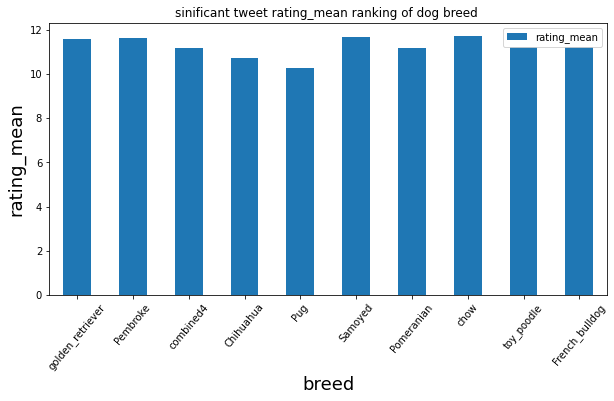

In [711]:
df3.plot.bar(figsize=(10,5),title='sinificant tweet rating_mean ranking of dog breed ',x="breed",fontsize=10,y='rating_mean',rot=50)
plt.xlabel('breed',fontsize=18)
plt.ylabel('rating_mean',fontsize=18)

In [712]:
# use color(from light to dark) to list out the tweet rating_mean ranking

Text(0, 0.5, 'rating_mean')

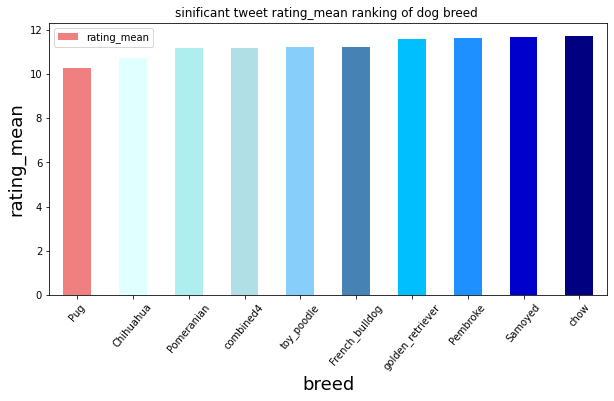

In [713]:
color_list = ['lightcoral', 'lightcyan', 'paleturquoise', 'powderblue','lightskyblue','steelblue','deepskyblue','dodgerblue','mediumblue','navy']
df4.plot.bar(figsize=(10,5),title='sinificant tweet rating_mean ranking of dog breed ',x="breed",fontsize=10,y='rating_mean',rot=50,color=color_list)
plt.xlabel('breed',fontsize=18)
plt.ylabel('rating_mean',fontsize=18)

In [714]:
combined4.timestamp_time

2       00:18:03
4       16:00:24
7       00:22:40
9       15:59:51
10      00:31:25
          ...   
2065    00:49:46
2067    00:30:50
2068    00:24:50
2070    23:21:54
2071    23:05:30
Name: timestamp_time, Length: 962, dtype: object

In [715]:
combined4.head(1)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_conf_level
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,confidence


In [716]:
combined5=combined4[['tweet_id','timestamp_time','timestamp_date','rating_numerator','rating_denominator_1','p1','p1_conf','p1_dog','p1_conf_level']]

In [717]:
combined5.head(4)

,tweet_id,timestamp_time,timestamp_date,rating_numerator,rating_denominator_1,p1,p1_conf,p1_dog,p1_conf_level
2,891815181378084864,00:18:03,2017-07-31,12,10,Chihuahua,0.716012,True,confidence
4,891327558926688256,16:00:24,2017-07-29,12,10,basset,0.555712,True,confidence
7,890729181411237888,00:22:40,2017-07-28,13,10,Pomeranian,0.566142,True,confidence
9,890240255349198849,15:59:51,2017-07-26,14,10,Pembroke,0.511319,True,confidence


In [718]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,timestamp_date,timestamp_time,rating_denominator_1
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56,10


In [719]:
df_clean.timestamp_date

0       2017-08-01
1       2017-08-01
2       2017-07-31
3       2017-07-30
4       2017-07-29
           ...    
2351    2015-11-16
2352    2015-11-16
2353    2015-11-15
2354    2015-11-15
2355    2015-11-15
Name: timestamp_date, Length: 2356, dtype: object

In [720]:
tweet_date_trend=df_clean.timestamp_date.value_counts()

In [721]:
tweet_date_trend

2015-11-28    26
2015-11-29    26
2015-11-16    25
2015-12-01    24
2015-11-19    23
              ..
2016-08-14     1
2017-06-05     1
2016-12-08     1
2016-08-22     1
2017-03-22     1
Name: timestamp_date, Length: 608, dtype: int64

Text(0, 0.5, 'tweet counts')

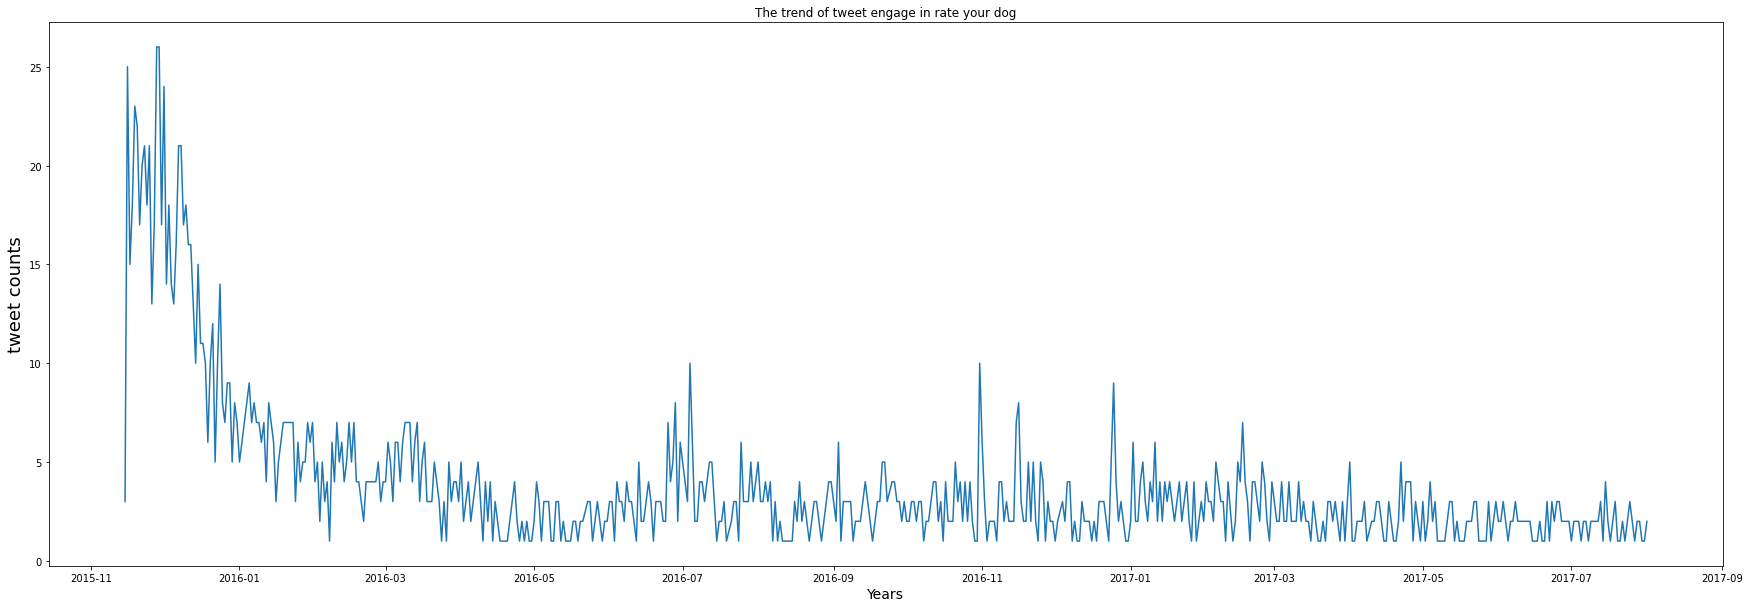

In [722]:
tweet_date_trend.plot.line(figsize=(30,10), title='The trend of tweet engage in rate your dog')
plt.xlabel('Years',fontsize=14)
plt.ylabel('tweet counts',fontsize=18)

In [723]:
## the trend going slow from 2015 to 2017

In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [725]:
combined3.favorite_count

2       25461
4       41048
7       56848
9       32467
10      31166
        ...  
2065      448
2067      136
2068      111
2070      128
2071      132
Name: favorite_count, Length: 972, dtype: int64

In [726]:
combined5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 2 to 2071
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   tweet_id              962 non-null    int64   
 1   timestamp_time        962 non-null    object  
 2   timestamp_date        962 non-null    object  
 3   rating_numerator      962 non-null    int64   
 4   rating_denominator_1  962 non-null    int64   
 5   p1                    962 non-null    object  
 6   p1_conf               962 non-null    float64 
 7   p1_dog                962 non-null    object  
 8   p1_conf_level         962 non-null    category
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 68.8+ KB


In [727]:
combined3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 2 to 2071
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   tweet_id                       972 non-null    int64   
 1   in_reply_to_status_id_x        8 non-null      float64 
 2   in_reply_to_user_id_x          8 non-null      float64 
 3   timestamp                      972 non-null    object  
 4   source_x                       972 non-null    object  
 5   text                           972 non-null    object  
 6   retweeted_status_id            35 non-null     float64 
 7   retweeted_status_user_id       35 non-null     float64 
 8   retweeted_status_timestamp     35 non-null     object  
 9   expanded_urls                  972 non-null    object  
 10  rating_numerator               972 non-null    int64   
 11  rating_denominator             972 non-null    int64   
 12  name                           972 

In [728]:
combined2.p1

0                       orange
1                    Chihuahua
2                    Chihuahua
3                  paper_towel
4                       basset
                 ...          
2068        miniature_pinscher
2069       Rhodesian_ridgeback
2070           German_shepherd
2071                   redbone
2072    Welsh_springer_spaniel
Name: p1, Length: 2073, dtype: object

In [729]:
top10_breeds_count = \
combined2[combined2.p1 != 'none'].p1.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / combined2.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

Top 10 dog breeds make up 32% of all tweets


In [730]:
# use combined5 because the dataset has sinificant meaning.

In [731]:
top10_breeds_count = \
combined5[combined5.p1 != 'none'].p1.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / combined5.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      124
Pembroke               70
Labrador_retriever     67
Chihuahua              50
pug                    45
Samoyed                32
Pomeranian             29
chow                   26
toy_poodle             24
French_bulldog         22
Name: p1, dtype: int64

Top 10 dog breeds make up 51% of all tweets


In [732]:
## Store Data

### the most update dateset will be archived in combined5 file.

In [733]:
combined5.to_csv('combined5.csv',index=False)

In [734]:
combined4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 2 to 2071
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   tweet_id                       962 non-null    int64   
 1   in_reply_to_status_id_x        8 non-null      float64 
 2   in_reply_to_user_id_x          8 non-null      float64 
 3   timestamp                      962 non-null    object  
 4   source_x                       962 non-null    object  
 5   text                           962 non-null    object  
 6   retweeted_status_id            35 non-null     float64 
 7   retweeted_status_user_id       35 non-null     float64 
 8   retweeted_status_timestamp     35 non-null     object  
 9   expanded_urls                  962 non-null    object  
 10  rating_numerator               962 non-null    int64   
 11  rating_denominator             962 non-null    int64   
 12  name                           962 

In [735]:
combined4.query('p1=="chow"')

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_conf_level
35,884876753390489601,NaN,NaN,2017-07-11 20:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. It's her first time outside. Mus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884876753...,...,chow,0.822103,True,Norwich_terrier,0.106075,True,Norfolk_terrier,0.037348,True,confidence
41,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,...,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,very confidence
128,862096992088072192,NaN,NaN,2017-05-10 00:08:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862096992...,...,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True,confidence
198,845677943972139009,NaN,NaN,2017-03-25 16:45:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. Please only send in dogs. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845677943...,...,chow,0.808681,True,groenendael,0.123141,True,Newfoundland,0.022143,True,confidence
232,838083903487373313,NaN,NaN,2017-03-04 17:49:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's puppears to be rare as al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838083903...,...,chow,0.800975,True,seat_belt,0.164133,False,Pomeranian,0.017981,True,confidence
438,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,...,chow,0.835102,True,Pomeranian,0.040783,True,Eskimo_dog,0.021274,True,confidence
453,802952499103731712,NaN,NaN,2016-11-27 19:09:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marley. She's having a ruff day. Prett...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/802952499...,...,chow,0.944032,True,golden_retriever,0.017240,True,Pomeranian,0.012085,True,very confidence
497,796080075804475393,NaN,NaN,2016-11-08 20:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yogi. He's 98% floof. Snuggable af. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796080075...,...,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False,very confidence
550,788150585577050112,NaN,NaN,2016-10-17 22:51:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a golden chow. Rather h*ckin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788150585...,...,chow,0.814145,True,Pomeranian,0.112704,True,Chihuahua,0.015883,True,confidence
618,777621514455814149,NaN,NaN,2016-09-18 21:33:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. You can't look at him and not s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777621514...,...,chow,0.999823,True,Norwich_terrier,0.000056,True,Pomeranian,0.000028,True,very confidence


In [736]:
combined4.query('p1=="chow"').jpg_url

35      https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg
41      https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg
128     https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg
198     https://pbs.twimg.com/media/C7xzmngWkAAAp9C.jpg
232     https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg
438     https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg
453     https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg
497     https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg
550     https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg
618     https://pbs.twimg.com/media/Csqqoo5WEAAMTVW.jpg
628     https://pbs.twimg.com/media/CsRY1jAWYAUOx55.jpg
661     https://pbs.twimg.com/media/CrJVupHXgAA4Dkk.jpg
671     https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg
700     https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg
778     https://pbs.twimg.com/media/Cm8JwBqW8AAFOEn.jpg
839     https://pbs.twimg.com/media/ClrK-rGWAAENcAa.jpg
889     https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg
916     https://pbs.twimg.com/media/Ci3GDeyUoAAK

In [737]:
combined4.loc[(combined4['p1']=='chow') & (combined4['rating_numerator'] >= 13.0)].jpg_url

35      https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg
41      https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg
128     https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg
232     https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg
550     https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg
1631    https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg
Name: jpg_url, dtype: object

In [738]:
combined4.head(1)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_conf_level
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,confidence


In [739]:
top_chow_img1=combined4.loc[(combined4['p1']=='chow') & (combined4['rating_numerator'] >= 13.0)]

In [740]:
top_chow_img1.shape

(6, 62)

In [741]:
top_chow_img1

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_conf_level
35,884876753390489601,NaN,NaN,2017-07-11 20:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. It's her first time outside. Mus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884876753...,...,chow,0.822103,True,Norwich_terrier,0.106075,True,Norfolk_terrier,0.037348,True,confidence
41,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,...,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,very confidence
128,862096992088072192,NaN,NaN,2017-05-10 00:08:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862096992...,...,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True,confidence
232,838083903487373313,NaN,NaN,2017-03-04 17:49:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's puppears to be rare as al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838083903...,...,chow,0.800975,True,seat_belt,0.164133,False,Pomeranian,0.017981,True,confidence
550,788150585577050112,NaN,NaN,2016-10-17 22:51:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a golden chow. Rather h*ckin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788150585...,...,chow,0.814145,True,Pomeranian,0.112704,True,Chihuahua,0.015883,True,confidence
1631,674468880899788800,NaN,NaN,2015-12-09 06:01:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He thinks he's flying. 13/10 th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674468880...,...,chow,0.526230,True,Pomeranian,0.283647,True,toy_poodle,0.067665,True,confidence


In [742]:
# top_chow_img=(combined4.loc[(combined4['p1']=='chow') & (combined4['rating_numerator'] >= 13.0)].jpg_url)

In [743]:
img_link=['https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg',
     'https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg',
     'https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg',
     'https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg',
     'https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg',
     'https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg']

In [744]:
top_chow_img1['dog_image']=img_link

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [745]:
## append the image url into the dataframe
top_chow_img1.head(1)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_conf_level,dog_image
35,884876753390489601,NaN,NaN,2017-07-11 20:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. It's her first time outside. Mus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884876753...,...,0.822103,True,Norwich_terrier,0.106075,True,Norfolk_terrier,0.037348,True,confidence,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg


In [746]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

In [747]:
top_chow_img1.to_html(escape=False, formatters=dict(dog_image=path_to_image_html))

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>tweet_id</th>\n      <th>in_reply_to_status_id_x</th>\n      <th>in_reply_to_user_id_x</th>\n      <th>timestamp</th>\n      <th>source_x</th>\n      <th>text</th>\n      <th>retweeted_status_id</th>\n      <th>retweeted_status_user_id</th>\n      <th>retweeted_status_timestamp</th>\n      <th>expanded_urls</th>\n      <th>rating_numerator</th>\n      <th>rating_denominator</th>\n      <th>name</th>\n      <th>doggo</th>\n      <th>floofer</th>\n      <th>pupper</th>\n      <th>puppo</th>\n      <th>timestamp_date</th>\n      <th>timestamp_time</th>\n      <th>rating_denominator_1</th>\n      <th>created_at</th>\n      <th>id_str</th>\n      <th>full_text</th>\n      <th>truncated</th>\n      <th>display_text_range</th>\n      <th>entities</th>\n      <th>extended_entities</th>\n      <th>source_y</th>\n      <th>in_reply_to_status_id_y</th>\n      <th>in_reply_to_status_id

In [748]:
## combined5=combined4[['tweet_id','timestamp_time','timestamp_date','rating_numerator','rating_denominator_1','p1','p1_conf','p1_dog','p1_conf_level']]

In [749]:
top_chow_img2=top_chow_img1[['tweet_id','timestamp_time','timestamp_date','rating_numerator','rating_denominator_1','p1','p1_conf','p1_dog','p1_conf_level', 'name','dog_image']]

In [750]:
from IPython.core.display import HTML

In [751]:
# Rendering the images in the dataframe using the HTML method.
## show the picture of the most high rate 'chow' and append on the dataframe

HTML(top_chow_img2.to_html(escape=False,formatters=dict(dog_image=path_to_image_html)))

,tweet_id,timestamp_time,timestamp_date,rating_numerator,rating_denominator_1,p1,p1_conf,p1_dog,p1_conf_level,name,dog_image
35,884876753390489601,20:47:12,2017-07-11,13,10,chow,0.822103,True,confidence,Lola,
41,883360690899218434,16:22:55,2017-07-07,13,10,chow,0.987997,True,very confidence,Grizzwald,
128,862096992088072192,00:08:34,2017-05-10,13,10,chow,0.677589,True,confidence,None,
232,838083903487373313,17:49:08,2017-03-04,13,10,chow,0.800975,True,confidence,Daisy,
550,788150585577050112,22:51:57,2016-10-17,13,10,chow,0.814145,True,confidence,Leo,
1631,674468880899788800,06:01:26,2015-12-09,13,10,chow,0.526230,True,confidence,Louis,


In [752]:
top_chow_img3=top_chow_img1[['dog_image']]

In [753]:
top_chow_img3

,dog_image
35,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg
41,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg
128,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg
232,https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg
550,https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg
1631,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg


In [754]:
HTML(top_chow_img3.to_html(escape=False,formatters=dict(dog_image=path_to_image_html)))

,dog_image
35,
41,
128,
232,
550,
1631,


In [755]:
# Saving the dataframe as a webpage
top_chow_img2.to_html('webpage.html',escape=False, formatters=dict(dog_image=path_to_image_html))

In [756]:
## find out what are thoese dog looks like (the rating larger than 100)

In [757]:
combined4.shape

(962, 62)

In [758]:
combined2.rating_numerator.value_counts()

12      473
10      429
11      413
13      283
9       151
8        95
7        52
14       40
5        34
6        32
3        19
4        16
2         9
1         5
0         2
80        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
143       1
420       1
1776      1
15        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [759]:
super_rate=combined2.query('rating_numerator > 100')

In [760]:
super_rate.jpg_url

734     https://pbs.twimg.com/ext_tw_video_thumb/75846...
802       https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
924       https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg
1379      https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg
1380      https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg
1512      https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg
1795      https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
Name: jpg_url, dtype: object

In [761]:
super_rate_img_link=['https://pbs.twimg.com/ext_tw_video_thumb/75846...',
     'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg',
     'https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg',
     'https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg',
     'https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg',
     'https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg',
    'https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg']

In [762]:
super_rate['dog_image']=super_rate_img_link

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [763]:
def path_to_image_html1(path):
    return '<img src="'+ path + '" width="80" >'

In [764]:
super_rate.to_html(escape=False, formatters=dict(dog_image1=path_to_image_html1))

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>tweet_id</th>\n      <th>in_reply_to_status_id_x</th>\n      <th>in_reply_to_user_id_x</th>\n      <th>timestamp</th>\n      <th>source_x</th>\n      <th>text</th>\n      <th>retweeted_status_id</th>\n      <th>retweeted_status_user_id</th>\n      <th>retweeted_status_timestamp</th>\n      <th>expanded_urls</th>\n      <th>rating_numerator</th>\n      <th>rating_denominator</th>\n      <th>name</th>\n      <th>doggo</th>\n      <th>floofer</th>\n      <th>pupper</th>\n      <th>puppo</th>\n      <th>timestamp_date</th>\n      <th>timestamp_time</th>\n      <th>rating_denominator_1</th>\n      <th>created_at</th>\n      <th>id_str</th>\n      <th>full_text</th>\n      <th>truncated</th>\n      <th>display_text_range</th>\n      <th>entities</th>\n      <th>extended_entities</th>\n      <th>source_y</th>\n      <th>in_reply_to_status_id_y</th>\n      <th>in_reply_to_status_id

In [765]:
super_rate1=super_rate[['tweet_id','timestamp_time','timestamp_date','rating_numerator','rating_denominator_1','p1','p1_conf','p1_dog','p1_conf_level','dog_image']]

In [766]:
## from IPython.core.display import HTML
HTML(super_rate1.to_html(escape=False,formatters=dict(dog_image=path_to_image_html1)))

,tweet_id,timestamp_time,timestamp_date,rating_numerator,rating_denominator_1,p1,p1_conf,p1_dog,p1_conf_level,dog_image
734,758467244762497024,01:00:57,2016-07-28,165,10,Labrador_retriever,0.436377,True,fair confidence,
802,749981277374128128,15:00:45,2016-07-04,1776,10,bow_tie,0.533941,False,confidence,
924,731156023742988288,16:15:54,2016-05-13,204,10,lakeside,0.501767,False,confidence,
1379,684225744407494656,04:11:44,2016-01-05,143,10,golden_retriever,0.203249,True,poor confidence,
1380,684222868335505415,04:00:18,2016-01-05,121,10,soft-coated_wheaten_terrier,0.791182,True,confidence,
1512,677716515794329600,05:06:23,2015-12-18,144,10,teddy,0.662908,False,confidence,
1795,670842764863651840,05:52:33,2015-11-29,420,10,microphone,0.096063,False,NaN,
